# Workbook Objective: 
### Clean ACT & SAT data
_____

#### Import Libraries

In [1]:
import pandas as pd
import missingno as mn
import difflib

#
#### Import ACT data

In [2]:
df_act_raw = pd.read_csv('./data/act_2019_ca.csv')

#### Original ACT Data Dictionary
##### https://www.cde.ca.gov/ds/sp/ai/reclayoutact19.asp
#
#

#### Import SAT data

In [3]:
df_sat_raw = pd.read_csv("./data/sat_2019_ca.csv")

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


#### Original SAT Data Dictionary
##### https://www.cde.ca.gov/ds/sp/ai/reclayoutsat19.asp
#
#

#### Import Charter school data

In [5]:
df_charter = pd.read_csv('./school_scraper/charter.csv')

,school name,charter number,site type,more details,statistical info,county
0,Academy of Alameda Middle School,1181,Site-based Instruction,Academy of Alameda Middle School,DataQuest Reports,Alameda
1,Achieve Academy,780,Site-based Instruction,Achieve Academy,DataQuest Reports,Alameda
2,AIMS College Prep Middle School,106,Site-based Instruction,AIMS College Prep Middle School,DataQuest Reports,Alameda
3,AIMS High School,765,Site-based Instruction,AIMS High School,DataQuest Reports,Alameda
4,Alameda Community Learning Center,352,Site-based Instruction,Alameda Community Learning Center,DataQuest Reports,Alameda


##### Data Source: https://www.cde.ca.gov/ds/si/cs/ap1/imagemap.aspx
##### (Data collected with ./school_scraper/get_charter.py)
#
#



#### Import California median housing value data

In [6]:
df_ca_homes = pd.read_csv('./data/ca_median_home_value.csv')

,county,median_home_price_q2_2021
0,Alameda,854696.0
1,Alpine,419080.0
2,Amador,359884.0
3,Butte,377765.0
4,Calaveras,366538.0


##### Data Source: https://www.nar.realtor/research-and-statistics/housing-statistics/county-median-home-prices-and-monthly-mortgage-payment
#
#

#### Import CA 'FIPS'
###### for mapping purposes only

In [9]:
df_fips = pd.read_csv('./data/ca-fips.csv', dtype={'Couty Code (FIPS)':str})

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,40,6,0,0,0,6000,California
1,50,6,1,0,0,6001,Alameda County
2,50,6,3,0,0,6003,Alpine County
3,50,6,5,0,0,6005,Amador County
4,50,6,7,0,0,6007,Butte County


##### Data Source: https://www.census.gov/geographies/reference-files/2016/demo/popest/2016-fips.html

#
#### Import Private School name data

In [153]:
df_private = pd.read_csv('./data/private_schools.csv')

##### Data Source: https://www.cde.ca.gov/SchoolDirectory/

#
#
#### Rename column dictionaries

In [155]:
col_dict_act = {
    'CDS'           : 'local_id',
    'CCode'         : 'county_id',
    'CDCode'        : 'county_dist_id',
    'SCode'         : 'school_id',
    'RType'         : 'record_type',
    'SName'         : 'school_name',
    'DName'         : 'dist_name',
    'CName'         : 'county_name',
    'Enroll12'      : 'enrollment_12',
    'NumTstTakr'    : 'test_takers',
    'AvgScrRead'    : 'avg_read',
    'AvgScrEng'     : 'avg_eng',
    'AvgScrMath'    : 'avg_math',
    'AvgScrSci'     : 'avg_sci',
    'NumGE21'       : 'abv_avg_num',
    'PctGE21'       : 'abv_avg_pct',
    'Year'          : 'year',
}

col_dict_sat = {
    'CDS'                       : 'local_id',
    'CCode'                     : 'county_id',
    'CDCode'                    : 'county_dist_id',
    'SCode'                     : 'school_id',
    'RType'                     : 'record_type',
    'SName'                     : 'school_name',
    'DName'                     : 'dist_name',
    'CName'                     : 'county_name',
    'Enroll12'                  : 'enrollment_12',
    'NumTSTTakr12'              : 'test_takers',
    'NumERWBenchmark12'         : 'avg_eng',
    'PctERWBenchmark12'         : 'pct_eng',
    'NumMathBenchmark12'        : 'avg_math',
    'PctMathBenchmark12'        : 'pct_math',
    'Enroll11'                  : 'enrollment_11',
    'NumTSTTakr11'              : 'test_takers_11',
    'NumERWBenchmark11'         : 'avg_eng_11',
    'PctERWBenchmark11'         : 'pct_eng_11',
    'NumMathBenchmark11'        : 'avg_math_11',
    'PctMathBenchmark11'        : 'pct_math_11',
    'TotNumBothBenchmark12'     : 'abv_avg_both',
    'PctBothBenchmark12'        : 'abv_pct_both',
    'TotNumBothBenchmark11'     : 'abv_avg_both_11',
    'PctBothBenchmark11'        : 'abv_pct_both_11',
    'Year'                      : 'year',
}

col_dict_charter = {
    'school name'       : 'school_name',
    'charter number'    : 'charter_num',
    'site type'         : 'site_type',
    'more details'      : 'charter_details',
    'statistical info'  : 'statistical_info',
    'county'            : 'county',
}

col_dict_house = {
    'county'                    : 'county_name',
    'median_home_price_q2_2021' : 'med_home_value',
}

col_dict_fips = {
    'Summary Level'                                             : 'summary_level',
    'State Code (FIPS)'                                         : 'state',
    'County Code (FIPS)'                                        : 'county',
    'County Subdivision Code (FIPS)'                            : 'county_sub',
    'Place Code (FIPS)'                                         : 'place',
    'Consolidtated City Code (FIPS)'                            : 'fips',
    'Area Name (including legal/statistical area description)'  : 'county_name',
}

col_dict_private = {
    'Record Type'   : 'record_type',
    'CDS Code'      : 'cds_code',
    'County'        : 'county',
    'District'      : 'district',
    'School'        : 'school',
    'High Grade'    : 'high_grade'
}

In [154]:
df_private.columns

Index(['Record Type', 'CDS Code', 'County', 'District', 'School',
       'High Grade'],
      dtype='object')

#
## ACT Data Cleaning
#### Inspect ACT data

In [151]:
df_act_raw.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year
0,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019
1,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019
2,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019
3,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019
4,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019


In [11]:
df_act_raw.rename(columns=col_dict_act, inplace=True)

In [12]:
df_act_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_id        2309 non-null   float64
 1   county_id       2309 non-null   float64
 2   county_dist_id  2309 non-null   float64
 3   school_id       1787 non-null   float64
 4   record_type     2309 non-null   object 
 5   school_name     1729 non-null   object 
 6   dist_name       2251 non-null   object 
 7   county_name     2309 non-null   object 
 8   enrollment_12   2309 non-null   float64
 9   test_takers     2309 non-null   float64
 10  avg_read        1953 non-null   object 
 11  avg_eng         1953 non-null   object 
 12  avg_math        1953 non-null   object 
 13  avg_sci         1953 non-null   object 
 14  abv_avg_num     1953 non-null   object 
 15  abv_avg_pct     1953 non-null   object 
 16  year            2309 non-null   object 
 17  Unnamed: 17     0 non-null      f

In [13]:
df_act_raw.shape

(2310, 18)

In [14]:
df_act_raw.describe()

,local_id,county_id,county_dist_id,school_id,enrollment_12,test_takers,Unnamed: 17
count,2.309000e+03,2309.000000,2.309000e+03,1.787000e+03,2309.000000,2309.000000,0.0
mean,2.929718e+13,28.666522,2.855616e+06,1.902681e+06,828.172802,143.182763,NaN
std,1.444996e+13,14.425498,1.492574e+06,1.838954e+06,10667.048988,1816.545548,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,1.964725e+13,19.000000,1.964519e+06,1.254385e+05,78.000000,3.000000,NaN
50%,3.066647e+13,30.000000,3.066548e+06,1.930288e+06,218.000000,30.000000,NaN
75%,3.868478e+13,38.000000,3.777032e+06,3.435674e+06,497.000000,86.000000,NaN
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,82668.000000,NaN


In [15]:
df_act_raw.dtypes

local_id          float64
county_id         float64
county_dist_id    float64
school_id         float64
record_type        object
school_name        object
dist_name          object
county_name        object
enrollment_12     float64
test_takers       float64
avg_read           object
avg_eng            object
avg_math           object
avg_sci            object
abv_avg_num        object
abv_avg_pct        object
year               object
Unnamed: 17       float64
dtype: object

#### Convert Year column to int of year completed

In [16]:
df_act_raw['year'] = 2019

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,NaN


#### '*' scores have fewer than 15 student tests.. Dropping * & NaN values as they cannot provide a comparison value

In [17]:
df_act_raw['avg_read'].value_counts()

*     532
23    136
25    132
21    131
19    118
22    118
24    117
18    116
20    114
26    105
27     72
17     66
16     57
28     54
29     32
15     27
30     10
14      7
31      5
13      2
12      1
32      1
Name: avg_read, dtype: int64

In [18]:
df_act_raw.drop(df_act_raw[df_act_raw['test_takers'] < 15].index, inplace=True)

#### Visualize NA values

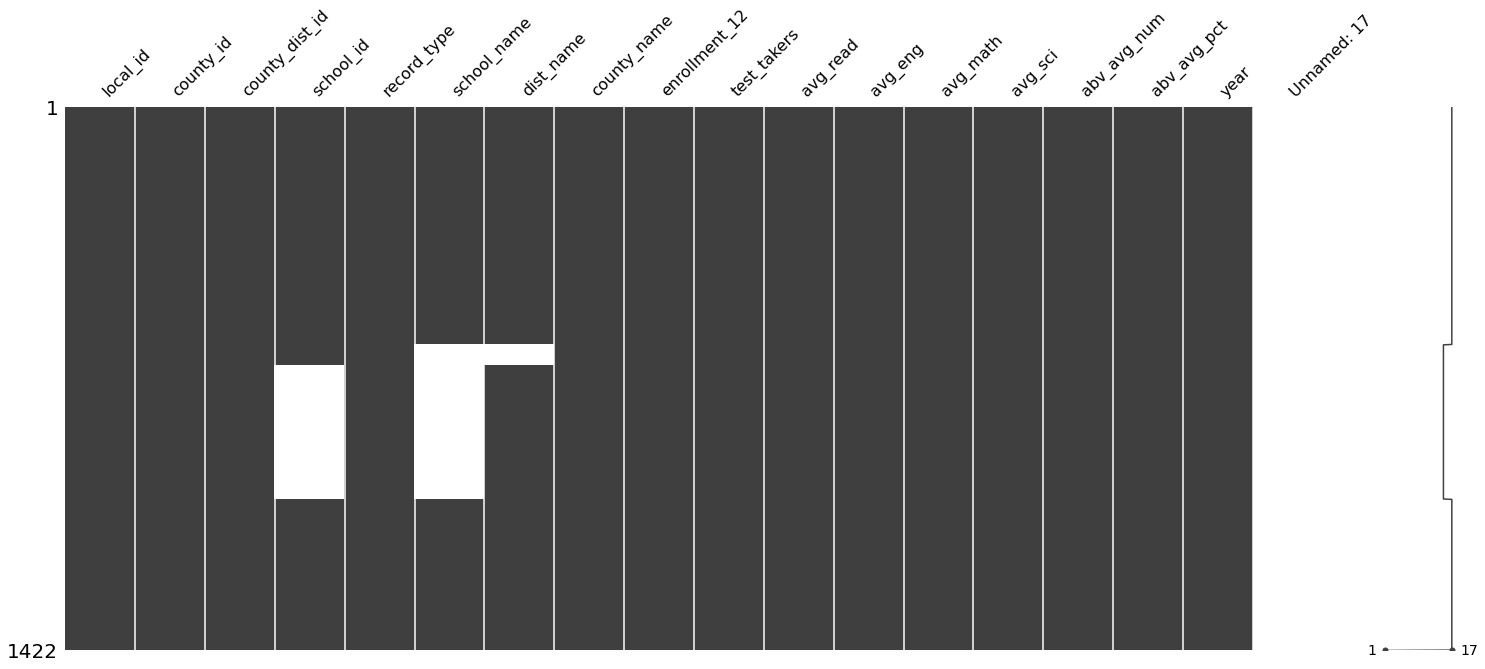

In [20]:
mn.matrix(df_act_raw);

#### Find empty data in final row

In [22]:
df_act_raw[df_act_raw['record_type'].isna()]

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year,Unnamed: 17
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN


#### Drop last row

In [23]:
df_act_raw.drop(labels=2309, inplace=True)
df_act_raw.reset_index(drop=True, inplace=True)

#### Drop Unamed: 17 column

In [ ]:
df_act_raw.drop(axis=1, labels="Unnamed: 17", inplace=True)

#### Locate record types

In [ ]:
df_act_raw['record_type'].unique()

#### Observations without a District Name (dist_name) are statistics aggregated by County

In [27]:
df_act_raw[df_act_raw['dist_name'].isna()].head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year
622,3.400000e+13,34.0,0.0,0.0,C,NaN,NaN,Sacramento,19540.0,3065.0,21,20,21,21,1526,49.79,2019
623,3.900000e+13,39.0,0.0,0.0,C,NaN,NaN,San Joaquin,11778.0,1348.0,22,21,21,21,693,51.41,2019
624,1.500000e+13,15.0,0.0,0.0,C,NaN,NaN,Kern,14229.0,1257.0,21,20,20,20,544,43.28,2019
625,4.500000e+13,45.0,0.0,0.0,C,NaN,NaN,Shasta,2161.0,173.0,26,24,24,24,131,75.72,2019
626,5.100000e+13,51.0,0.0,0.0,C,NaN,NaN,Sutter,1827.0,196.0,23,22,22,22,117,59.69,2019


#### Observations with an empty School Name (school_name) are statistics aggregated by District

In [28]:
df_act_raw['record_type'][df_act_raw['school_id'].isna()].value_counts()

D    350
Name: record_type, dtype: int64

In [29]:
df_act_raw['record_type'].value_counts()

S    1016
D     350
C      54
X       1
Name: record_type, dtype: int64

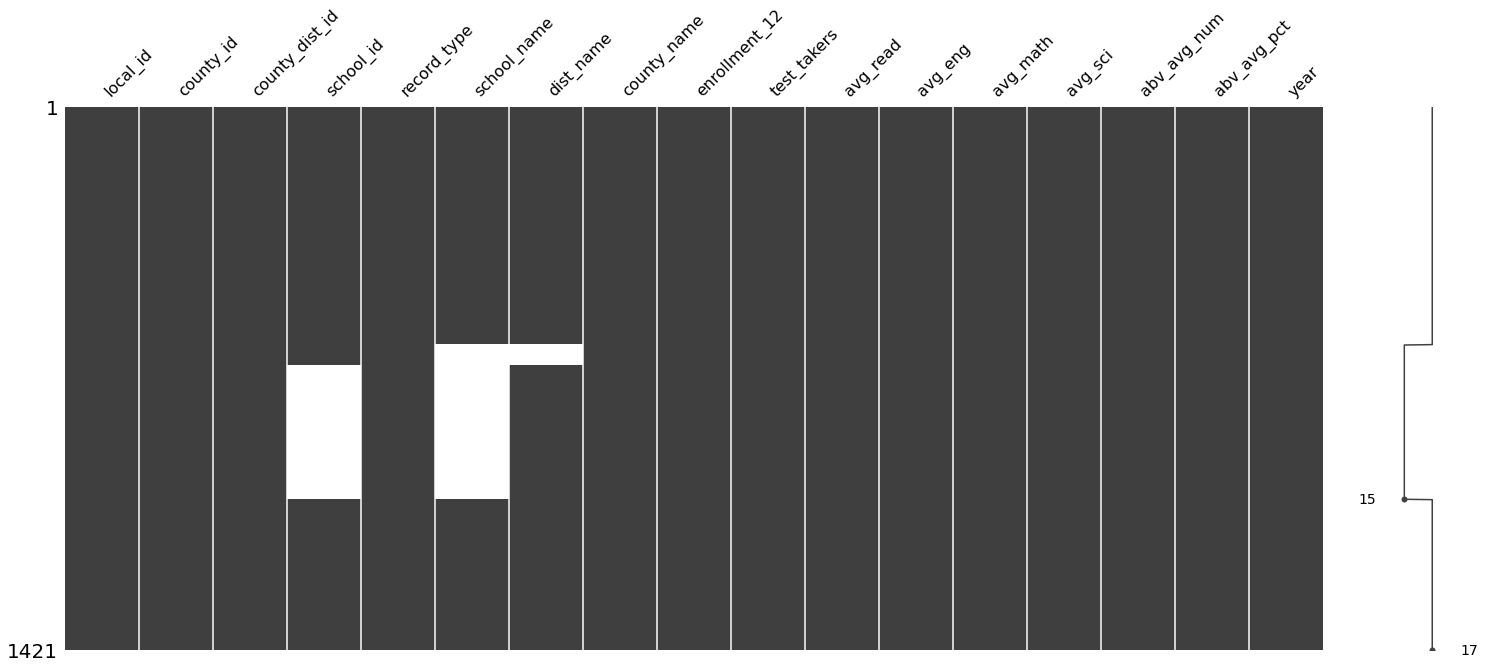

In [30]:
mn.matrix(df_act_raw);

#### Missing values cleaned, however columns containing score averages are not formatted as numeric


In [31]:
df_act_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_id        1421 non-null   float64
 1   county_id       1421 non-null   float64
 2   county_dist_id  1421 non-null   float64
 3   school_id       1071 non-null   float64
 4   record_type     1421 non-null   object 
 5   school_name     1017 non-null   object 
 6   dist_name       1367 non-null   object 
 7   county_name     1421 non-null   object 
 8   enrollment_12   1421 non-null   float64
 9   test_takers     1421 non-null   float64
 10  avg_read        1421 non-null   object 
 11  avg_eng         1421 non-null   object 
 12  avg_math        1421 non-null   object 
 13  avg_sci         1421 non-null   object 
 14  abv_avg_num     1421 non-null   object 
 15  abv_avg_pct     1421 non-null   object 
 16  year            1421 non-null   int64  
dtypes: float64(6), int64(1), object(1

#### Convert string values to numeric

In [32]:
for _ in ['avg_read', 'avg_eng', 'avg_math', 'avg_sci', 'abv_avg_num', 'abv_avg_pct']:
    df_act_raw.loc[:, _] = pd.to_numeric(df_act_raw.loc[:, _])

#### Isolate 'School' level data

In [33]:
df_act_scho = pd.DataFrame(df_act_raw[df_act_raw['record_type'] == 'S'])
df_act_scho.reset_index(drop=True, inplace=True)
# District, County, and State level data can all be derived from School level data and are redundant

### ACT data is clean!

In [34]:
df_act_scho.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year
0,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019
1,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019
2,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019
3,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019
4,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019


In [35]:
df_act_scho.to_csv('./data-clean/act_ca_school_2019.csv', index=False)

## SAT Data Cleaning
#### Inspect SAT data

In [ ]:
df_sat_raw.head()

In [36]:
df_sat_raw.rename(columns=col_dict_sat, inplace=True)

In [37]:
df_sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   local_id         2579 non-null   float64
 1   county_id        2579 non-null   float64
 2   county_dist_id   2579 non-null   float64
 3   school_id        2579 non-null   float64
 4   record_type      2579 non-null   object 
 5   school_name      1982 non-null   object 
 6   dist_name        2521 non-null   object 
 7   county_name      2579 non-null   object 
 8   enrollment_12    2579 non-null   float64
 9   test_takers      2579 non-null   float64
 10  avg_eng          2304 non-null   object 
 11  pct_eng          2304 non-null   object 
 12  avg_math         2304 non-null   object 
 13  pct_math         2304 non-null   object 
 14  enrollment_11    2579 non-null   float64
 15  test_takers_11   2579 non-null   float64
 16  avg_eng_11       2269 non-null   object 
 17  pct_eng_11    

In [38]:
df_sat_raw.shape

(2580, 26)

In [39]:
df_sat_raw.describe()

,local_id,county_id,county_dist_id,school_id,enrollment_12,test_takers,enrollment_11,test_takers_11,Unnamed: 25
count,2.579000e+03,2579.000000,2.579000e+03,2.579000e+03,2579.000000,2579.000000,2579.000000,2579.000000,0.0
mean,2.915139e+13,28.519581,2.915138e+06,1.544913e+06,748.155487,264.274137,730.865452,320.473052,NaN
std,1.428328e+13,14.258173,1.428327e+06,1.812049e+06,10095.758681,3568.205236,9792.971460,4396.615761,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.964725e+13,19.000000,1.964725e+06,1.025080e+05,63.000000,5.000000,52.500000,5.000000,NaN
50%,3.066597e+13,30.000000,3.066597e+06,1.377860e+05,171.000000,55.000000,165.000000,62.000000,NaN
75%,3.777103e+13,37.000000,3.777103e+06,3.037422e+06,462.000000,161.000000,474.000000,180.000000,NaN
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,170411.000000,474843.000000,206642.000000,NaN


In [40]:
df_sat_raw.dtypes

local_id           float64
county_id          float64
county_dist_id     float64
school_id          float64
record_type         object
school_name         object
dist_name           object
county_name         object
enrollment_12      float64
test_takers        float64
avg_eng             object
pct_eng             object
avg_math            object
pct_math            object
enrollment_11      float64
test_takers_11     float64
avg_eng_11          object
pct_eng_11          object
avg_math_11         object
pct_math_11         object
abv_avg_both        object
abv_pct_both        object
abv_avg_both_11     object
abv_pct_both_11     object
year                object
Unnamed: 25        float64
dtype: object

#### Drop unnamed column & convert year column to int of year completed

In [41]:
df_sat_raw['year'] = 2019
df_sat_raw.drop(axis=1, labels="Unnamed: 25", inplace=True)

#### Inspect data for missing values

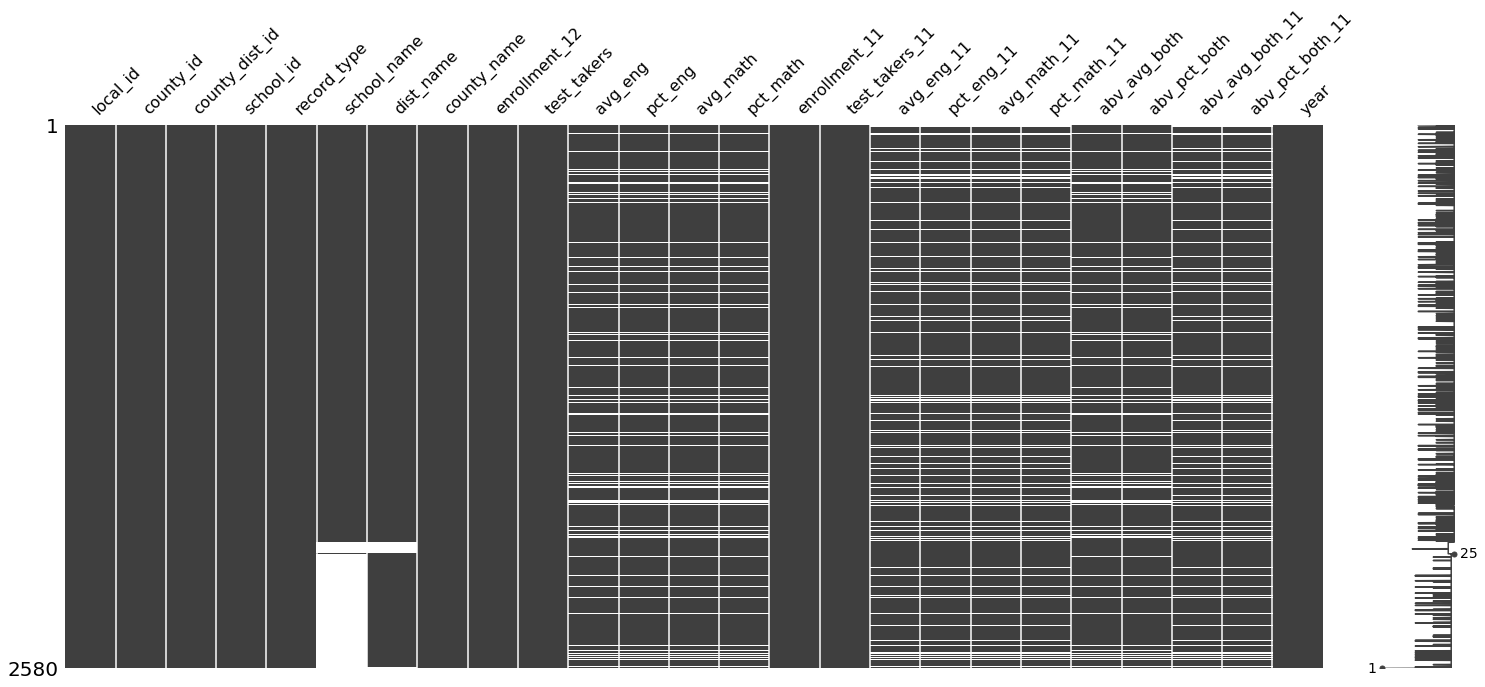

In [42]:
mn.matrix(df_sat_raw);

#### Drop schools with viewer than 15 test takers

In [43]:
df_sat_raw = df_sat_raw[df_sat_raw['test_takers'] >= 15]

#### Re-inspect for missing values

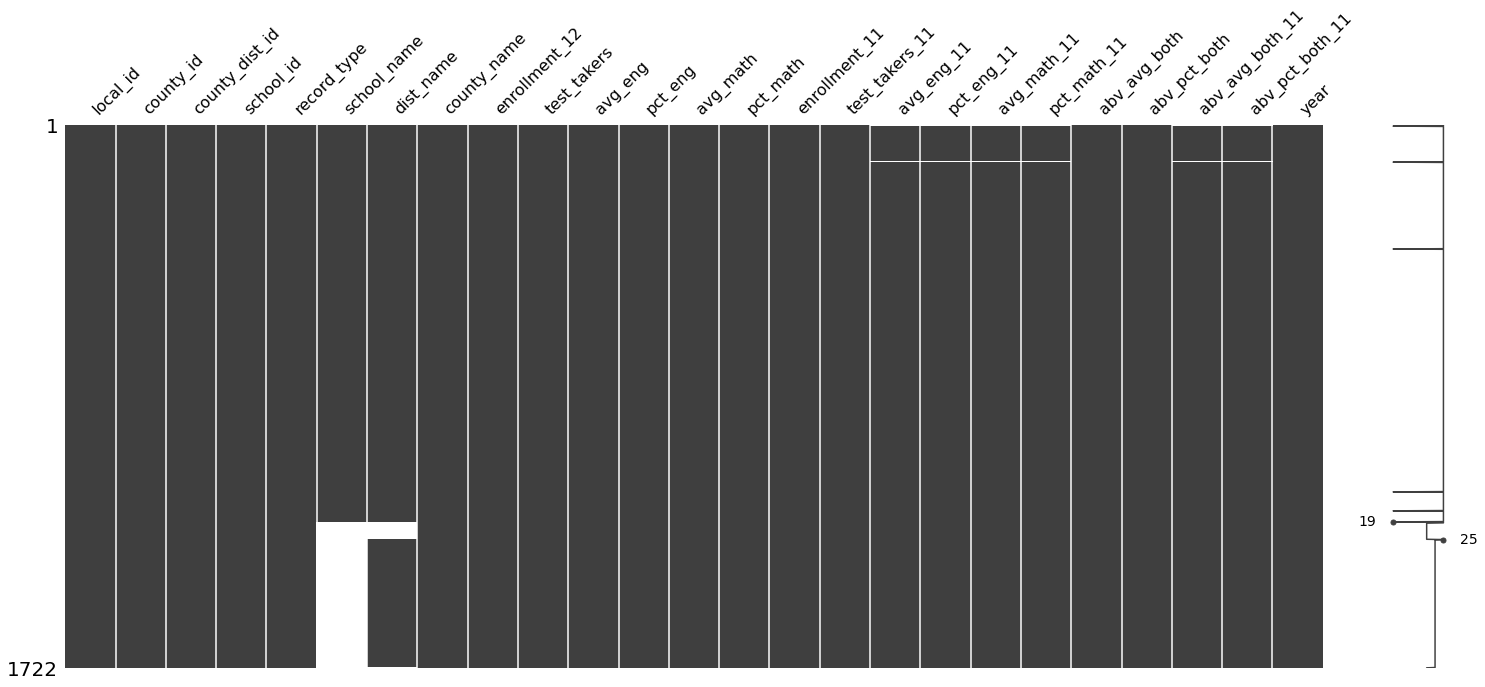

In [45]:
mn.matrix(df_sat_raw);

#### Drop 11th grade stats. 
#### Focusing on 12th only as we do not have ACT data for 11th grade students

In [46]:
df_sat_raw.drop(axis=1, labels=['enrollment_11', 'test_takers_11', 'avg_eng_11', 'pct_eng_11',
                                'avg_math_11', 'pct_math_11', 'abv_avg_both_11', 'abv_pct_both_11'], inplace=True)

#### Re-inspect for missing values

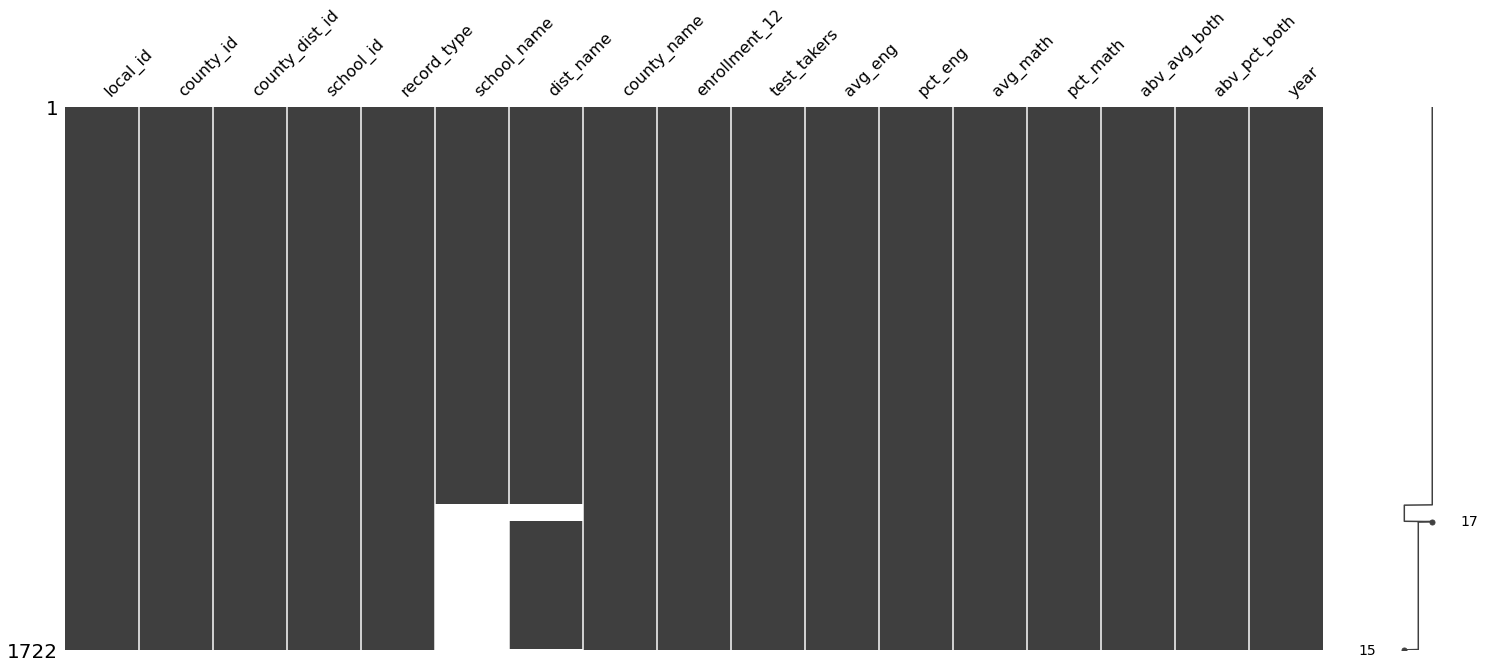

In [47]:
mn.matrix(df_sat_raw);

#### Observations with an empty School name (school_name) are statistics aggregated by District. Same as ACT
#### Observations without a District name (dist_name) are statistics aggregated by County. Same as ACT

In [48]:
df_sat_raw.isna().sum()

local_id            0
county_id           0
county_dist_id      0
school_id           0
record_type         0
school_name       460
dist_name          55
county_name         0
enrollment_12       0
test_takers         0
avg_eng             0
pct_eng             0
avg_math            0
pct_math            0
abv_avg_both        0
abv_pct_both        0
year                0
dtype: int64

In [49]:
df_sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 2 to 2578
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_id        1722 non-null   float64
 1   county_id       1722 non-null   float64
 2   county_dist_id  1722 non-null   float64
 3   school_id       1722 non-null   float64
 4   record_type     1722 non-null   object 
 5   school_name     1262 non-null   object 
 6   dist_name       1667 non-null   object 
 7   county_name     1722 non-null   object 
 8   enrollment_12   1722 non-null   float64
 9   test_takers     1722 non-null   float64
 10  avg_eng         1722 non-null   object 
 11  pct_eng         1722 non-null   object 
 12  avg_math        1722 non-null   object 
 13  pct_math        1722 non-null   object 
 14  abv_avg_both    1722 non-null   object 
 15  abv_pct_both    1722 non-null   object 
 16  year            1722 non-null   int64  
dtypes: float64(6), int64(1), object(1

#### Convert average score data types to numeric

In [50]:
for _ in ['avg_eng', 'pct_eng', 'avg_math', 'pct_math', 'abv_avg_both', 'abv_pct_both']:
    df_sat_raw.loc[:, _] = pd.to_numeric(df_sat_raw.loc[:, _])
df_sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 2 to 2578
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_id        1722 non-null   float64
 1   county_id       1722 non-null   float64
 2   county_dist_id  1722 non-null   float64
 3   school_id       1722 non-null   float64
 4   record_type     1722 non-null   object 
 5   school_name     1262 non-null   object 
 6   dist_name       1667 non-null   object 
 7   county_name     1722 non-null   object 
 8   enrollment_12   1722 non-null   float64
 9   test_takers     1722 non-null   float64
 10  avg_eng         1722 non-null   int64  
 11  pct_eng         1722 non-null   float64
 12  avg_math        1722 non-null   int64  
 13  pct_math        1722 non-null   float64
 14  abv_avg_both    1722 non-null   int64  
 15  abv_pct_both    1722 non-null   float64
 16  year            1722 non-null   int64  
dtypes: float64(9), int64(4), object(4

In [51]:
df_sat_raw['record_type'].value_counts()

S    1261
D     405
C      55
X       1
Name: record_type, dtype: int64

#### Isolate 'School' level data

In [52]:
df_sat_scho = pd.DataFrame(df_sat_raw[df_sat_raw['record_type'] == 'S'])
df_sat_scho.reset_index(drop=True, inplace=True)
# State, County, and District level data are redundant

### SAT Data is clean!

In [53]:
df_sat_scho.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_eng,pct_eng,avg_math,pct_math,abv_avg_both,abv_pct_both,year
0,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2019
1,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2019
2,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,2019
3,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,2019
4,3.367215e+13,33.0,3367215.0,3336955.0,S,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3,17.65,2,11.76,2,11.76,2019


In [54]:
df_sat_scho.to_csv('./data-clean/sat_ca_school_2019.csv', index=False)

#
## Charter School Data Cleaning & Merging
#### Inspect Charter data

In [ ]:
df_charter.head()

In [84]:
df_charter.rename(columns=col_dict_charter, inplace=True)

In [86]:
df_charter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school_name       1297 non-null   object
 1   charter_num       1297 non-null   object
 2   site_type         1297 non-null   object
 3   charter_details   1297 non-null   object
 4   statistical_info  1297 non-null   object
 5   county            1297 non-null   object
dtypes: object(6)
memory usage: 60.9+ KB


In [87]:
df_charter.shape

(1297, 6)

In [88]:
df_charter.describe()

,school_name,charter_num,site_type,charter_details,statistical_info,county
count,1297,1297,1297,1297,1297,1297
unique,1292,1278,3,1292,1,53
top,Discovery Charter,756,Site-based Instruction,Discovery Charter,DataQuest Reports,Los Angeles
freq,3,9,953,3,1297,376


In [89]:
df_charter.dtypes

school_name         object
charter_num         object
site_type           object
charter_details     object
statistical_info    object
county              object
dtype: object

#
#### Check school names against charter school name using sequence similarity matcher

In [90]:
def check_sim(school_name):
    """checks school name againt data frame containing all charter schools in CA.
    Returns similarity score via difflib.SequenceMatcher, charter school name target school resembles, and county of charter school"""
    max_similarity = (0, "", "")
    for charter in list(df_charter['school_name']):
        sim_test = difflib.SequenceMatcher(None, school_name, charter).ratio()                  # scores similarity between all charter schools in list and school name
        if sim_test > max_similarity[0]:                                                        # gathers the largest similarity score
            county = df_charter['county'][df_charter['school_name'] == charter].values[0]       # grabs county for further similarity checking
            max_similarity = (sim_test, charter, county)
    return max_similarity[0], max_similarity[1], max_similarity[2]

# similarity test adapted from stack overflow user: duhaime

##### Source: https://stackoverflow.com/a/31236578

#
#### Check school name similarity ratio and create new columns for SAT dataset

In [91]:
df_sat_scho['sim'],  df_sat_scho['sim_name'], df_sat_scho['sim_name_county'] = zip(*df_sat_scho['school_name'].map(check_sim))
# unzipping multiple columns adapted from stack overflow user: ostrokach

##### Source: https://stackoverflow.com/a/27385043

#
#### Check school name similarity ratio and create new columns for ACT dataset

In [92]:
df_act_scho['sim'],  df_act_scho['sim_name'], df_act_scho['sim_name_county'] = zip(*df_act_scho['school_name'].map(check_sim))
# unzipping multiple columns adapted from stack overflow user: ostrokach

##### Source: https://stackoverflow.com/a/27385043

#
#### Locate similarly named schools between Charter dataset and SAT dataset
##### Cross reference: https://www.cde.ca.gov/SchoolDirectory/

In [93]:
df_sat_scho[['school_name', 'county_name', 'sim', 'sim_name', 'sim_name_county']][(df_sat_scho['sim'] < 1) & (df_sat_scho['sim'] > .7) &    # filter most similar
 (df_sat_scho['county_name'] == df_sat_scho['sim_name_county'])].sort_values(by='sim', ascending=False)                                     # confirm county names match

,school_name,county_name,sim,sim_name,sim_name_county
975,PUC Early College Academy for Leaders and Scho...,Los Angeles,0.982759,PUC Early College Academy for Leaders and Scho...,Los Angeles
249,CATCH Prep Charter High Inc.,Los Angeles,0.982456,"CATCH Prep Charter High, Inc.",Los Angeles
978,Visions In Education,Sacramento,0.950000,Visions in Education,Sacramento
857,Alliance Judy Ivie Burton Technology Academy High,Los Angeles,0.946237,Alliance Judy Ivie Burton Technology Academy,Los Angeles
116,Animo College Preparatory Academy,Los Angeles,0.916667,Animo Watts College Preparatory Academy,Los Angeles
1074,Da Vinci Communications,Los Angeles,0.901961,Da Vinci Communications High,Los Angeles
1085,Granada Hills Charter High,Los Angeles,0.893617,Granada Hills Charter,Los Angeles
687,Middle College High,Orange,0.863636,Unity Middle College High,Orange
211,Options for Youth-Acton,Los Angeles,0.846154,"Options For Youth-Acton, INC.",Los Angeles
71,Summit Public School: Rainier,Santa Clara,0.842105,Summit Public School: Denali,Santa Clara


#
#### Check for mislabeled Charter schools before encoding similarly named schools

In [94]:
checker = []
for _ in range(df_sat_scho.shape[0]):

    s = df_sat_scho[['school_name', 'county_name', 'sim']].iloc[_:(_+1)].values
    county, school, charter = s[0][1], s[0][0], s[0][2]                                                     # isolate important data
    if charter == 1:
        if len(df_charter[(df_charter['county'] == county) & (df_charter['school_name'] == school)]) > 0:   # if previously labeled as perfect name match,
            checker.append(1)                                                                               # confirm county also matches
        else:
            checker.append(0)                                                                               # if counties do not match, label as public school
    else:
        checker.append(0)

charters_found = df_sat_scho[df_sat_scho['sim'] == 1].count()[0]
mislabeled = charters_found - sum(checker)

print(f"{mislabeled} charters were mislabeled from having identical names in different counties.")

df_sat_scho['sim'] = checker                                                                                # re-label similarity column

5 charters were mislabeled from having identical names in different counties.


#
#### Encode similarly named schools between Charter school and school name in SAT dataset

In [95]:
# Check for mislabeled
df_sat_scho.loc[[975, 249, 978, 857, 116, 1074, 1085, 211, 71, 1137, 502, 1130, 930, 1162, ], 'sim'] = 1
# Found an additional 14 charter schools

#
#### Locate similarly named schools between Charter dataset and ACT dataset
##### Cross reference: https://www.cde.ca.gov/SchoolDirectory/

In [96]:
df_act_scho[['school_name', 'county_name', 'sim', 'sim_name', 'sim_name_county']][(df_act_scho['sim'] < 1) & (df_act_scho['sim'] > .7) &
 (df_act_scho['county_name'] == df_act_scho['sim_name_county'])].sort_values(by='sim', ascending=False)

,school_name,county_name,sim,sim_name,sim_name_county
500,Lennox Mathematics Science and Technology Academy,Los Angeles,0.989899,"Lennox Mathematics, Science and Technology Aca...",Los Angeles
733,PUC Early College Academy for Leaders and Scho...,Los Angeles,0.982759,PUC Early College Academy for Leaders and Scho...,Los Angeles
23,Alliance Judy Ivie Burton Technology Academy High,Los Angeles,0.946237,Alliance Judy Ivie Burton Technology Academy,Los Angeles
44,Animo College Preparatory Academy,Los Angeles,0.916667,Animo Watts College Preparatory Academy,Los Angeles
224,Da Vinci Communications,Los Angeles,0.901961,Da Vinci Communications High,Los Angeles
364,Granada Hills Charter High,Los Angeles,0.893617,Granada Hills Charter,Los Angeles
573,Middle College High,Orange,0.863636,Unity Middle College High,Orange
885,Summit Public School: Rainier,Santa Clara,0.842105,Summit Public School: Denali,Santa Clara
330,Foshay Learning Center,Los Angeles,0.818182,Gorman Learning Center,Los Angeles
142,Camino Nuevo Charter High,Los Angeles,0.807692,El Camino Real Charter High,Los Angeles


#### Check for mislabeled Charter schools before encoding similarly named schools

In [97]:
checker = []
for _ in range(df_act_scho.shape[0]):

    s = df_act_scho[['school_name', 'county_name', 'sim']].iloc[_:(_+1)].values
    county, school, charter = s[0][1], s[0][0], s[0][2]
    if charter == 1:
        if len(df_charter[(df_charter['county'] == county) & (df_charter['school_name'] == school)]) > 0:
            checker.append(1)
        else:
            checker.append(0)
    else:
        checker.append(0)

charters_found = df_act_scho[df_act_scho['sim'] == 1].count()[0]
mislabeled = charters_found - sum(checker)

print(f"{mislabeled} charters were mislabeled from having identical names in different counties.")

df_act_scho['sim'] = checker

3 charters were mislabeled from having identical names in different counties.


#
#### Encode similarly named schools between Charter school and school name in ACT dataset

In [98]:
df_act_scho.loc[[500, 733, 23, 44, 224, 364, 885, 142, 19, ], 'sim'] = 1
# Found an additional 9 charter schools

#
#### Final manual check of Charter school name columns

In [99]:
df_act_scho[['sim', 'school_name']][(df_act_scho['school_name'].map(lambda x: True if "charter" in x.lower() else False)) & (df_act_scho['sim'] != 1)]
# Charter Oak High is NOT a Charter school

,sim,school_name
179,0,Charter Oak High


In [100]:
df_sat_scho[['sim', 'school_name']][(df_sat_scho['school_name'].map(lambda x: True if "charter" in x.lower() else False)) & (df_sat_scho['sim'] != 1)]

,sim,school_name
696,0,Inspire Charter
913,0,Charter Oak High


#### One Charter slipped thru the cracks!

In [101]:
df_sat_scho.loc[[696, ], 'sim'] = 1

#
#### Drop encoding columns

In [102]:
df_sat_scho.drop(['sim_name', 'sim_name_county'], axis=1, inplace=True)
df_act_scho.drop(['sim_name', 'sim_name_county'], axis=1, inplace=True)

#### Rename 'sim' columns to 'is_charter'

In [103]:
df_sat_scho.rename(columns={'sim':'is_charter'}, inplace=True)
df_act_scho.rename(columns={'sim':'is_charter'}, inplace=True)

#### Encode 'is_charter' columns

In [104]:
df_sat_scho['is_charter'] = df_sat_scho['is_charter'].apply(lambda x: 1 if x == 1 else 0)
df_act_scho['is_charter'] = df_act_scho['is_charter'].apply(lambda x: 1 if x == 1 else 0)

### Charter data cleaned & merged in SAT & ACT school level datasets!

In [105]:
df_sat_scho.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_eng,pct_eng,avg_math,pct_math,abv_avg_both,abv_pct_both,year,is_charter
0,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2019,0
1,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2019,0
2,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,2019,0
3,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,2019,0
4,3.367215e+13,33.0,3367215.0,3336955.0,S,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3,17.65,2,11.76,2,11.76,2019,0


In [106]:
df_act_scho.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year,is_charter
0,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,0
1,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,0
2,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019,1
3,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019,0
4,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019,0


In [107]:
df_sat_scho.to_csv('./data-clean/sat_ca_school_2019.csv', index=False)
df_act_scho.to_csv('./data-clean/act_ca_school_2019.csv', index=False)

## CA Housing Value Data
#### Inspect housing data

In [ ]:
df_ca_homes.head()

In [108]:
df_ca_homes.rename(columns=col_dict_house, inplace=True)

In [109]:
df_ca_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   county_name     57 non-null     object 
 1   med_home_value  57 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [110]:
df_ca_homes.shape

(58, 2)

In [111]:
df_ca_homes.describe()

,med_home_value
count,5.700000e+01
mean,5.026747e+05
std,2.578363e+05
min,1.612990e+05
25%,3.087180e+05
50%,3.992330e+05
75%,6.705040e+05
max,1.195275e+06


In [112]:
df_ca_homes.dtypes

county_name        object
med_home_value    float64
dtype: object

#
#### Find missing values & drop

In [113]:
df_ca_homes[['med_home_value']].isna().sum()

med_home_value    1
dtype: int64

In [114]:
df_ca_homes.tail()

,county_name,med_home_value
53,Tulare,284046.0
54,Tuolumne,331777.0
55,Ventura,708536.0
56,Yolo,552495.0
57,NaN,NaN


In [115]:
df_ca_homes.drop(57, inplace=True)

#
#### Adjust column dtype

In [116]:
df_ca_homes['med_home_value'] = df_ca_homes['med_home_value'].apply(lambda x: int(x))

In [118]:
df_ca_homes.dtypes

county_name       object
med_home_value     int64
dtype: object

### Housing data cleaned!

In [119]:
df_ca_homes.head()

,county_name,med_home_value
0,Alameda,854696
1,Alpine,419080
2,Amador,359884
3,Butte,377765
4,Calaveras,366538


In [120]:
df_ca_homes.to_csv('./data-clean/housing_values_2021.csv', index=False)

#
## California FIPS
#### Inspect FIPS data

In [152]:
df_fips.head()

,fips,county_name
0,6001,Alameda
1,6003,Alpine
2,6005,Amador
3,6007,Butte
4,6009,Calaveras


In [138]:
df_fips.rename(columns=col_dict_fips, inplace=True)

In [139]:
df_fips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   summary_level  59 non-null     int64 
 1   state          59 non-null     int64 
 2   county         59 non-null     int64 
 3   county_sub     59 non-null     int64 
 4   place          59 non-null     int64 
 5   fips           59 non-null     int64 
 6   county_name    59 non-null     object
dtypes: int64(6), object(1)
memory usage: 3.4+ KB


In [140]:
df_fips.shape

(59, 7)

In [141]:
df_fips.describe()

,summary_level,state,county,county_sub,place,fips
count,59.000000,59.0,59.000000,59.0,59.0,59.000000
mean,49.830508,6.0,57.016949,0.0,0.0,6057.016949
std,1.301889,0.0,34.322252,0.0,0.0,34.322252
min,40.000000,6.0,0.000000,0.0,0.0,6000.000000
25%,50.000000,6.0,28.000000,0.0,0.0,6028.000000
50%,50.000000,6.0,57.000000,0.0,0.0,6057.000000
75%,50.000000,6.0,86.000000,0.0,0.0,6086.000000
max,50.000000,6.0,115.000000,0.0,0.0,6115.000000


In [142]:
df_fips.dtypes

summary_level     int64
state             int64
county            int64
county_sub        int64
place             int64
fips              int64
county_name      object
dtype: object

#
#### Clean county_name column values & drop unused columns

In [143]:
# Clean county_name column values
df_fips['county_name'] = df_fips['county_name'].str.replace(" County", "")

# Dropping observation for CA. Only need County codes.
df_fips.drop(0, inplace=True)

# Drop extra columns
df_fips.drop(columns=['summary_level', 'state', 'county', 'county_sub', 'place'], inplace=True)
df_fips.reset_index(drop=True, inplace=True)

### FIPS data cleaned!

In [145]:
df_fips.head()

,fips,county_name
0,6001,Alameda
1,6003,Alpine
2,6005,Amador
3,6007,Butte
4,6009,Calaveras


In [ ]:
df_fips.to_csv('./data-clean/ca_fips.csv', index=False)

#
## Check for private schools

In [147]:
df_private.head()

,Record Type,CDS Code,County,District,School,High Grade
0,School,1611196154637,Alameda,Alameda Unified,Advance College Academy,12
1,School,1611196933154,Alameda,Alameda Unified,Saint Joseph Notre Dame High School,12
2,School,1611196979140,Alameda,Alameda Unified,The Phillips Academy,12
3,School,1611276138044,Alameda,Albany City Unified,Tilden Preparatory School,12
4,School,1611430117002,Alameda,Berkeley Unified,Bayhill High,12


In [156]:
df_private.rename(columns=col_dict_private, inplace=True)

#
#### Grab Private school names

In [148]:
private_school_names = df_private['school'].to_list()

In [149]:
count = 0
for school in df_sat_scho['school_name'].to_list():                 # cross reference school names in SAT dataset with column containing Private school names
    if school in private_school_names:
        count += 1
        print("School name match found!")
        print(df_sat_scho[df_sat_scho['school_name'] == school])
        print(df_private[df_private['school'] == school])

print(f'{count} possible private schools found')

School name match
         local_id  county_id  county_dist_id  school_id record_type  \
251  3.066431e+13       30.0       3066431.0  3030616.0           S   

        school_name           dist_name county_name  enrollment_12  \
251  Oxford Academy  Anaheim Union High      Orange          200.0   

     test_takers  avg_eng  pct_eng  avg_math  pct_math  abv_avg_both  \
251        113.0      113    100.0       106     93.81           106   

     abv_pct_both  year  is_charter  
251         93.81  2019           0  
     Record Type        CDS Code      County                     District  \
1403      School  50712826161939  Stanislaus  Stanislaus Union Elementary   

              School  High Grade  
1403  Oxford Academy          12  
1 possible private schools found


##### Name match is in a different county. Can drop Private school data
#
#
### No Private school name matches found. School data is all Public schools or Charters
#### Private school data will not be used or kept

#
## Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|local_id|float|CA ACT|State assigned identifier: full|
|county_id|float|CA ACT|State assigned identifier: county|
|county_dist_id|float|CA ACT|State assigned identifier: district|
|school_id|float|CA ACT|State assigned identifier: school|
|record_type|object|CA ACT|State assigned categorical identifier|
|school_name|object|CA ACT|Name of the school|
|dist_name|object|CA ACT|Name of the school district|
|county_name|object|CA ACT|Name of the county|
|enrollment_12|float|CA ACT|Number of students enrolled in the school|
|test_takers|float|CA ACT|Number of students that completed the ACT|
|avg_read|int|CA ACT|Average ACT score of all students in sample for the Reading portion of the exam|
|avg_eng|int|CA ACT|Average ACT score of all students in sample for the English portion of the exam|
|avg_math|int|CA ACT|Average ACT score of all students in sample for the Math portion of the exam|
|avg_sci|int|CA ACT|Average ACT score of all students in sample for the Science portion of the exam|
|comp_score|float|CA ACT|Composite ACT score of all students in sample. Commonly referred to as, 'ACT score'|
|abv_avg_num|int|CA ACT|Total number of students to record an ACT composite score at or above 21|
|abv_avg_pct|float|CA ACT|Percentage of test takers to record an ACT composite score at or above 21 (percentage 10.3 = 10.3%)|
|year|int|CA ACT|Year of exam|
|is_charter|int|CA ACT|Charter school categorical identifier (1 = school is a Charter while 0 = school is not a Charter)|
|local_id|float|CA SAT|State assigned identifier: full|
|county_id|float|CA SAT|State assigned identifier: county|
|county_dist_id|float|CA SAT|State assigned identifier: district|
|school_id|float|CA SAT|State assigned identifier: school|
|record_type|object|CA SAT|State assigned categorical identifier|
|school_name|object|CA SAT|Name of the school|
|dist_name|object|CA SAT|Name of the school district|
|county_name|object|CA SAT|Name of the county|
|enrollment_12|float|CA SAT|Number of students enrolled in the school|
|test_takers|float|CA SAT|Number of students that completed the SAT|
|avg_eng|int|CA SAT|Number of students at the school to score at least 480 on the English portion of the exam|
|pct_eng|float|CA SAT|Percentage of test takers at the school to score at least 480 on the English portion of the exam (percentage 10.3 = 10.3%)|
|avg_math|int|CA SAT|Number of students at the school to score at least 530 on the Math portion of the exam|
|pct_math|float|CA SAT|Percentage of test takers at the school to score at least 530 on the Math portion of the exam (percentage 10.3 = 10.3%)|
|abv_avg_both|int|CA SAT|Number of students at the school to score at least 480 on English and at least 530 on the Math portions of the exam|
|abv_pct_both|float|CA SAT|Percentage of test takers at the school to score at least 480 on English and at least 530 on the Math portions of the exam (percentage 10.3 = 10.3%)|
|year|int|CA SAT|Year of exam|
|is_charter|int|CA SAT|Charter school categorical identifier (1 = school is a Charter while 0 = school is not a Charter)|
|county_name|object|Housing Values|Name of the county|
|med_home_value|int|Housing Values|Median home price of the county|
|sat_score_range|object|SAT Score Distribution|Categorical range of SAT scores|
|fips|int|FIPS|CA State assigned code for County classification. Used only for graphing|
|county_name|object|FIPS|Name of the County|